In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('exercis2_data.csv', parse_dates = True, index_col = 0)

In [9]:
# Compute the returns to the asset (under variable Open)
data["return"] = np.log(data["Open"]).diff()

In [13]:
# Compute the strategy returns using the signal and return column you computed
data["stategy_return"] = data["signal"].shift()*data["return"]

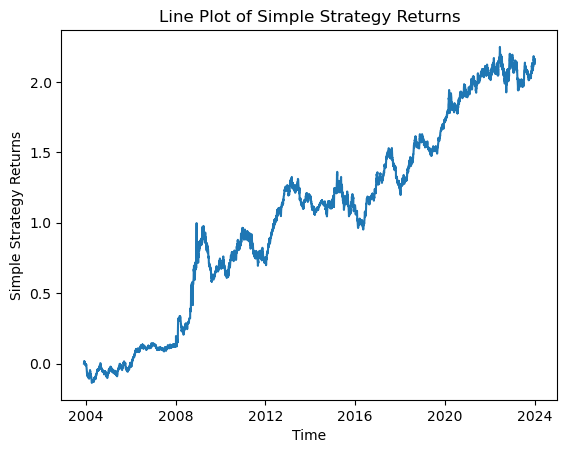

In [22]:
# Compute and vsualize the equity curve
#we get the summtory of the returns as a composite (thats why we sum, is the composite return for one year)
data["log strategy returns"] = data["stategy_return"].cumsum()
#Here we transforma that to a simple return (could be the total until that time)
data["simple strategy returns"] = np.exp(data["log strategy returns"]) - 1
plt.plot(data['simple strategy returns'])
plt.title('Line Plot of Simple Strategy Returns')
plt.xlabel('Time')
plt.ylabel('Simple Strategy Returns')
plt.show()

In [29]:
# Compute the CCROR and Annualized Return
#Asuming an initial investment of 100,000. 
data["simple strategy returns 2"] = (data["simple strategy returns"]+1)*100000
log_change = np.log(data["simple strategy returns 2"].iloc[-1]/data["simple strategy returns 2"].iloc[1])
n_years = (len(data)/252) #252 is the avergae of trading days
ccror = log_change/n_years*100
print(ccror)

5.536151226559347


In [40]:
np.power(1,(1/n_years))

1.0

In [43]:
(np.power((data["simple strategy returns 2"].iloc[-1]/data["simple strategy returns 2"].iloc[1]),(1/n_years))-1)*100

5.692263611535475

In [45]:
# Aggregate your strategy returns at the monthly level
data.tail()

,signal,Open,return,stategy_return,log strategy returns,simple strategy returns,simple strategy returns 2
Date,,,,,,,
2023-12-28,-1.0,0.90020,-0.005926,0.005926,1.151712,2.163603,316360.279783
2023-12-29,1.0,0.90349,0.003648,-0.003648,1.148063,2.152083,315208.275282
2024-01-02,-1.0,0.90590,0.002664,0.002664,1.150727,2.160491,316049.070682
2024-01-03,-1.0,0.91393,0.008825,-0.008825,1.141902,2.132722,313272.191487
2024-01-04,1.0,0.91510,0.001279,-0.001279,1.140623,2.128717,312871.664689


In [56]:
#Getting the strategy returns at the monthly level
(np.exp(data["stategy_return"].resample("m").sum())-1)*100

Date
2003-12-31   -0.821993
2004-01-31   -8.020695
2004-02-29    0.587331
2004-03-31   -1.403604
2004-04-30   -2.448007
                ...   
2023-09-30   -2.148160
2023-10-31    0.420777
2023-11-30    2.582806
2023-12-31    1.561265
2024-01-31   -0.741291
Freq: M, Name: stategy_return, Length: 242, dtype: float64

In [ ]:
# Optional: Compute the Sharpe Ratio
